In [25]:
#Computer Vision Libaries in PyTorch
#torchvision-base domin libary for pytorch computer vision
#torchvision.datasets-get datasets and data loading functions for computer vision here
#torchvision.models:get pretrained computer vision models that you can leverage for your own problem
#torchvision.transforms:functions for manipulating your vision data(images) to be suitable for use with an ML model.
#torch.utils.data.Dataset:Base dataset class for PyTorch
#torch.utils.data.DataLoader:Creates a python iterable over a dataset

In [26]:
# import PyTorch
import torch
from torch import nn 

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt 

In [27]:
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu117
0.14.1+cu117


In [28]:
from torchvision import datasets
train_data=datasets.FashionMNIST(
                        root="Root",
                        train=True,
                        download=True,
                        transform=torchvision.transforms.ToTensor(),
                        target_transform=None

)

test_data=datasets.FashionMNIST(
            root="Root",
            train=False,
            download=True,
            transform=ToTensor(),
            target_transform=None
)

In [29]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [30]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [31]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [32]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [33]:
image.shape,class_name[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

Shape of the image:torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

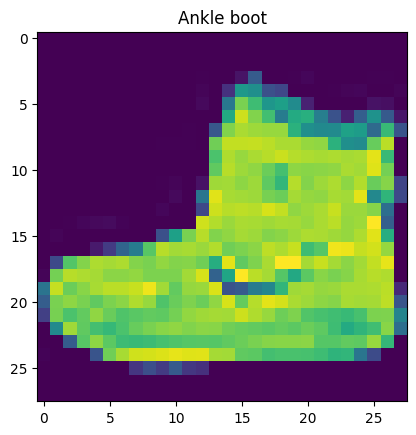

In [34]:
#Visualizing our data
import matplotlib.pyplot as plt 
image,label=train_data[0]
print(f"Shape of the image:{image.shape}")
plt.imshow(image.squeeze())
plt.title(class_name[label])

(-0.5, 27.5, 27.5, -0.5)

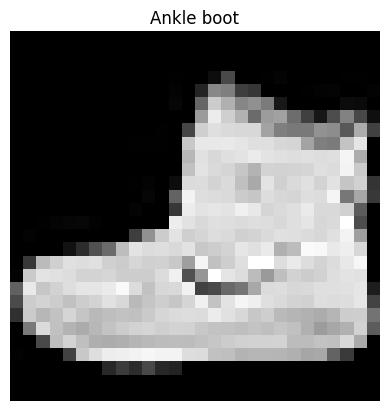

In [35]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)

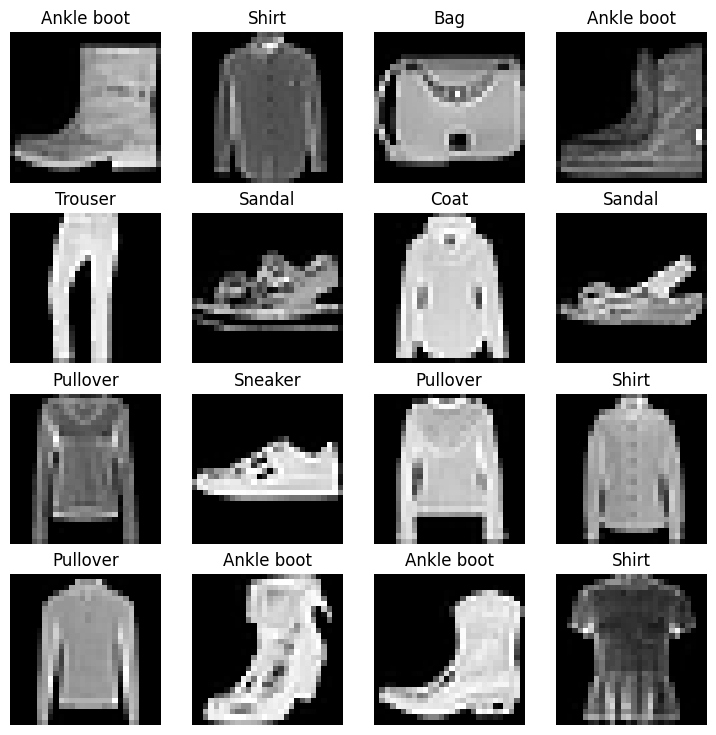

In [36]:
#plot more data
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_name[label])
    plt.axis(False)

In [37]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: Root
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: Root
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [38]:
#Prepare DataLoader
#Right now, our data is in form of PyTorch Datasets.
#DataLoader turns our data into a python iterable.
#More Specifically, we want to turn our data into batches(mini batches).

#Why do we need this?
#1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images
#in one hit. So we break it down to 32 images at a time(batch size of 32). 
#It gives our neural network more chances to update its gradients per epoch.


In [39]:
from torch.utils.data import DataLoader


#Setup batch size hyperparameter
BATCH_SIZE=32
#Turn datasets into iterables(batchs)
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [40]:
#let's checkout what we've created 
print(f"DataLoaders:{train_dataloader,test_dataloader}")
print(f"Length of train_dataloader:{len(train_dataloader)} batchs of {BATCH_SIZE}")
print(f"Length of test DataLoader:{len(test_dataloader)} batchs of {BATCH_SIZE}")

DataLoaders:(<torch.utils.data.dataloader.DataLoader object at 0x7f2c70479310>, <torch.utils.data.dataloader.DataLoader object at 0x7f2c703f3f70>)
Length of train_dataloader:1875 batchs of 32
Length of test DataLoader:313 batchs of 32


In [41]:
#Checkout what's inside the training dataloader
train_feature_batch,train_labels_batch=next(iter(train_dataloader))
train_feature_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:8,label size:torch.Size([])


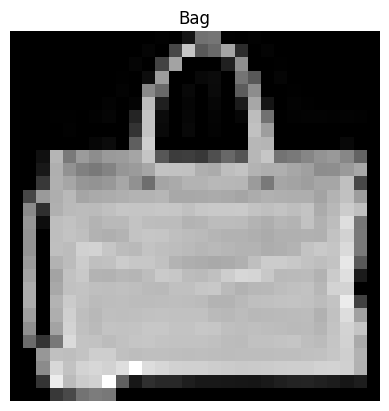

In [42]:
#torch.manual_seed(42)
random_idx=torch.randint(0,len(train_feature_batch),size=[1]).item()
img,label=train_feature_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label},label size:{label.shape}")


In [43]:
#Model 0:Buid a baseline model
#when starting to build a series of machine learning modelling experiements,it's best parctice to start with a baseline model.
#A baseline model is a simple model you will try and improve upon with subsquent models/experiments
#in other words: Start simply and add complexity when necessary.

 

In [44]:
#create a flatten layer
flatten_model=nn.Flatten()
#get a single sample
x=train_feature_batch[0]

#Flatten the sample
output=flatten_model(x) #perform forward pass

#Print what happened
print(f"Shape before flattening:{x.shape}") #------>[colour_channel,height,width]
print(f"Shape after flattening:{output.shape}") #----->[color_channel,height*width]






Shape before flattening:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


In [45]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_shape:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_shape),
            nn.Linear(in_features=hidden_shape,out_features=output_shape)
        )
    
    def forward(self,x):
        return self.layer_stack(x)

In [46]:
torch.manual_seed(42)
#setup model with input parameters
model_0=FashionMNISTModelV0(
    input_shape=28*28, #this is 28*28
    hidden_shape=10, #how many units in tne hidden layer
    output_shape=len(class_name)#one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [47]:
import requests
from pathlib import Path

if Path("Helper_functions.py").is_file():
    print("Helper_function.py already exist")
    
else:
    print("Donunloading helper_function.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)

Donunloading helper_function.py


In [48]:
#Import accuracy matrics
from helper_function import accuracy_fn

#setup loss function
loss_fn=nn.CrossEntropyLoss()

#optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [49]:
#Creating a function to time our experiments
#Machine learning is very experemental
#Two of main things you'll often want to track are:
        #1.Model's Performance(loss and accuracy values etc)
        #2.How fast it runs

In [50]:
from timeit import default_timer as timer 
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
    """Prints difference between start and end time...."""
    total_time=end-start
    print(f"Train time on :{device}:{total_time:.3f} seconds")
    return total_time

In [51]:
#Creating a training loop and training model on batches of data......
#Highlight that the optimizer will update a model's parameters once per batch rather then once per epoch.

In [52]:
#1.Loop through epochs
#2.Loop through training batches,perform training steps,calculate the train loss per batch.
#3.Loop through testing batches,perform testing steps,calculate the test loss per batch.
#4.Print out what's happening
#5.Time it all

In [53]:
from tqdm.auto import tqdm
for i in tqdm(range(1,10)):
    print(i)

100%|██████████| 9/9 [00:00<00:00, 28554.26it/s]

1
2
3
4
5
6
7
8
9


In [54]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

#set the number of epochs
Epochs=2

#Create training and test loop
for epoch in tqdm(range(Epochs)):
    print(f"Epoch:{epoch}\n.............")
    
    #Training 
    train_loss,train_acc=0,0
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        #1.Forward pass
        y_pred=model_0(X)
        
        #2.calculate the loss
        loss=loss_fn(y_pred,y)
        train_loss+=loss #accumulate train loss
       
        acc=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        train_acc+=acc
        
        
        #3.Optimizer to zero grads
        optimizer.zero_grad()
        
        #4.loss backward
        loss.backward()
        
        #5.Optimizer step
        optimizer.step()
        
        #printout what's happenning
        if batch%400==0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    
    #Divide total train loss by length of train dataloader 
    train_loss /=len(train_dataloader) 
    train_acc /=len(train_dataloader)
    
    
    #Testing
    test_loss,test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            #1.Forward pass
            test_pred=model_0(X_test)
            
            #2.Calculate the loss
            loss=loss_fn(test_pred,y_test)
            test_loss+=loss
            
            #3.Calculate the accuracy
            test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
            
            
        #Calculate the test loss average per batch
        test_loss /=len(test_dataloader)
        
        #Calculate the test accuracy average per batch
        test_acc /=len(test_dataloader)
        
    #print what's happening
    print(f"\nTrain loss:{train_loss:.4f} Train acc:{train_acc:.4f} Test loss:{test_loss:.4f} Test acc:{test_acc:.4f}")

#Calculate the training time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))
            
            
            
            
            
            
                
    
    

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:0
.............
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 50%|█████     | 1/2 [00:19<00:19, 19.86s/it]


Train loss:0.5904 Train acc:79.1717 Test loss:0.5095 Test acc:82.0387
Epoch:1
.............
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 2/2 [00:38<00:00, 19.39s/it]


Train loss:0.4763 Train acc:83.3200 Test loss:0.4799 Test acc:83.1969
Train time on :cpu:38.780 seconds


In [55]:
#Making predictions and get Model0 results
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:loss_fn,
               accuracy_fn):
    """Returns a dictionay containing the results of model predicting on data_loader"""
    
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            #Make predictions
            y_pred=model(X)
            
            #Accumulate the loss and acc valuse per batch
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
            
        #Scale loss and acc to find the average loss/acc per batch
        loss /=len(data_loader)
        acc /=len(data_loader)
    
    return {"model_name":model.__class__.__name__,#only works when model was created with class
            "model_loss":loss.item(),
            "moel_acc":acc}
    
model_0_result=eval_model(model=model_0,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)

model_0_result
        
    
            

100%|██████████| 313/313 [00:02<00:00, 134.49it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4798900783061981,
 'moel_acc': 83.19688498402556}

In [56]:
#setup device-agnostic code
import torch
device="Cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [57]:
#Model 1:Building a better model with non-linearity
#Create a model with non-linear and linear layers

from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(), #flatten inputs into single vector.
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)


In [58]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_name)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [59]:
#Setup loss,optimizer,and evaluation metrices
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss() #Measure how wrong our model is
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1) #tries to update our model's parameters to reduce the loss


In [60]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
    '''Perform a training with model trying to learn from the dataloader'''
    
    train_loss,train_acc=0,0
    #put model into training mode
    model.train()
    
    #Add a loop to loop through the training batches
    for batch,(X,y) in enumerate(data_loader):
        #put data to traget devie
        X.to(device),y.to(device)
        
        #1.Forward pass (output the raw logits from the model)
        y_pred=model(X)
        
        #2.Calculate the loss and accuracy(per batch)
        loss=loss_fn(y_pred,y)
        train_loss +=loss #accumulate the train loss
        train_acc +=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        
        #Optimizer zero grads
        optimizer.zero_grad()
        
        #Loss Backward
        loss.backward()
        
        #optimizer step (update the model's parameters once per batch)
        optimizer.step()
        
        #Devide total train loss and acc by length of train dataloader
    train_loss /=len(data_loader)
    train_acc /=len(data_loader)
    print(f"Train loss:{train_loss:.5f} Train accuracyt:{train_acc:.2f}%")     

In [61]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss,test_acc=0,0
    
    #put the data in eval model
    model.eval()
    
    #Turn on inference mode context manager
    with torch.inference_mode():
        for X_test,y_test in data_loader:
            
            #send the data to the target device
            X_test=X_test.to(device)
            y_test=y_test.to(device)
            
            #1.Forward pass (outputs raw logits)
            test_pred=model(X_test)
            
            #2.Calculate the loss
            loss=loss_fn(test_pred,y_test)
            test_loss+=loss
            
            #3.Calculate the accuracy
            test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1)) #go from logits----->prediction labels
            
            
        #Calculate the test loss average per batch
        test_loss /=len(test_dataloader)
        
        #Calculate the test accuracy average per batch
        test_acc /=len(test_dataloader)
    print(f"Tesing loss:{test_loss:.4f} Testing accuracy:{test_acc:.2f}%\n")

In [145]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_cpu=timer()

#set Epochs
Epochs=2

#create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(Epochs)):
    print(f"Epoch:{epoch}\n------------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_cpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=device)



  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:0
------------
Train loss:0.68752 Train accuracyt:75.19%


 50%|█████     | 1/2 [00:04<00:04,  4.70s/it]

Tesing loss:0.7223 Testing accuracy:73.91%

Epoch:1
------------
Train loss:0.68752 Train accuracyt:75.19%


100%|██████████| 2/2 [00:08<00:00,  4.43s/it]

Tesing loss:0.7223 Testing accuracy:73.91%

Train time on :cpu:8.871 seconds


In [63]:
model_0_result

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4798900783061981,
 'moel_acc': 83.19688498402556}

In [64]:
model_1_result=eval_model(model=model_1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model_1_result

100%|██████████| 313/313 [00:02<00:00, 134.20it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7222671508789062,
 'moel_acc': 73.91174121405751}

In [65]:
#Model2:Building a convolutional Neural Network(CNN)
#CNN's are also known ConvNets.
#CNN's are known for there capabilities to find patterns in visual data

In [128]:
#Create a Convolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape:int,hidden_shape:int,output_shape=int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                        out_channels=hidden_shape,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=hidden_shape,
                      out_channels=hidden_shape,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_shape,
                      out_channels=hidden_shape,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=hidden_shape,
                      out_channels=hidden_shape,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_shape*7*7, #there is a trick to calculate this...........!
                      out_features=output_shape)
        )
    
    def forward(self,x):
        x=self.conv_block_1(x)
        #print(f"output shape of conv_block_1: {x.shape}")
        x=self.conv_block_2(x)
        #print(f"output shape of conv_block_2: {x.shape}")
        x=self.classifier(x)
        #print(f"output shape of classifier: {x.shape}")
        return x
            
        


In [129]:
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_shape=10,
                            output_shape=len(class_name)).to(device)

In [119]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [120]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

output shape of conv_block_1: torch.Size([1, 10, 14, 14])
output shape of conv_block_2: torch.Size([1, 10, 7, 7])
output shape of classifier: torch.Size([1, 10])


tensor([[-0.0290,  0.0182,  0.0197, -0.1016, -0.0628,  0.0692,  0.1020,  0.0743,
          0.0469, -0.0586]], grad_fn=<AddmmBackward0>)

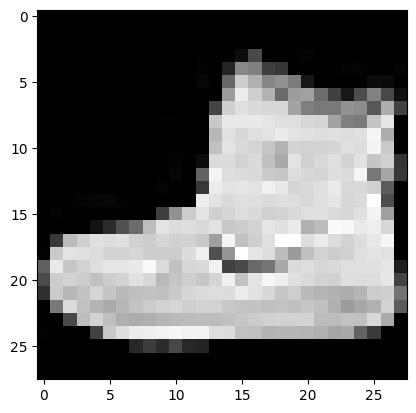

In [108]:
plt.imshow(image.squeeze(0),cmap="gray")

In [68]:
#stepping through nn.Conv2d()
torch.manual_seed(42)
#create a batch of images

images=torch.rand(size=(32,3,64,64))
test_image=images[0]
print(f"image batch shape:{images.shape}")
print(f"Single image shape:{test_image.shape}")
                  

image batch shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])


In [69]:
torch.manual_seed(42)
#Create a single conv2d layer

conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3,3),
                     stride=1,
                     padding=1)
#Pass the data through  the convolutational layer
conv_output=conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [70]:
#stepping through nn.MaxPool2d()
#print out original image shape without unsqueezed dimension
print(f"Test image original shape:{test_image.shape}")
print(f"Test image with unsqueezed dimension::{test_image.unsqueeze(0).shape}") 

#create a simple nn.MaxPool2d layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass data through conv_layer
test_image_through_conv=conv_layer(test_image)
print(f"Shape after going through conv_layer():{test_image_through_conv.shape}")

#pass data through the maxpool layer
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer():{test_image_through_conv_and_max_pool.shape}")

Test image original shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimension::torch.Size([1, 3, 64, 64])
Shape after going through conv_layer():torch.Size([10, 64, 64])
Shape after going through conv_layer() and max_pool_layer():torch.Size([10, 32, 32])


In [71]:
torch.manual_seed(42)
random_tensor=torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor\n:{random_tensor}")
print(f"Shape of random tensor:{random_tensor.shape}")
max_pool_layer=nn.MaxPool2d(kernel_size=2)
#Pass the random_tensor to max_pool layer
max_pool_tensor=max_pool_layer(random_tensor)
print(f"\n Max pool tensor\n:{max_pool_tensor}")
print(f"Shape of maxpool tensor:{max_pool_tensor.shape}")


Random tensor
:tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Shape of random tensor:torch.Size([1, 1, 2, 2])

 Max pool tensor
:tensor([[[[0.3367]]]])
Shape of maxpool tensor:torch.Size([1, 1, 1, 1])


In [130]:
#Setup a loss function for model_2
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
train_step(model=model_2,
           data_loader=train_dataloader,
           loss_fn=loss_fn,
           optimizer=optimizer,
           accuracy_fn=accuracy_fn,
           device=device)


In [144]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_cpu=timer()

#set Epochs
Epochs=2

#create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(Epochs)):
    print(f"Epoch:{epoch}\n------------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_cpu=timer()
total_train_time_model_2=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=device)


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:0
------------
Train loss:0.29624 Train accuracyt:89.29%


 50%|█████     | 1/2 [00:13<00:13, 13.15s/it]

Tesing loss:0.3003 Testing accuracy:89.12%

Epoch:1
------------
Train loss:0.27624 Train accuracyt:89.97%


100%|██████████| 2/2 [00:27<00:00, 13.72s/it]

Tesing loss:0.2904 Testing accuracy:89.33%

Train time on :cpu:27.448 seconds


In [133]:
model_2_result=eval_model(model=model_2,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model_2_result

100%|██████████| 313/313 [00:01<00:00, 269.38it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3279045522212982,
 'moel_acc': 88.4285143769968}

In [134]:
model_0_result

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4798900783061981,
 'moel_acc': 83.19688498402556}

In [135]:
model_1_result

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7222671508789062,
 'moel_acc': 73.91174121405751}

In [147]:
#Compare model results and training time
import pandas as pd
compare_results=pd.DataFrame([model_0_result,
                              model_1_result,
                              model_2_result])
compare_results

,model_name,model_loss,moel_acc
0,FashionMNISTModelV0,0.479890,83.196885
1,FashionMNISTModelV1,0.722267,73.911741
2,FashionMNISTModelV2,0.327905,88.428514


In [148]:
compare_results["Training Time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model_name,model_loss,moel_acc,Training Time
0,FashionMNISTModelV0,0.479890,83.196885,38.780318
1,FashionMNISTModelV1,0.722267,73.911741,8.871120
2,FashionMNISTModelV2,0.327905,88.428514,27.448307


Text(0, 0.5, 'model')

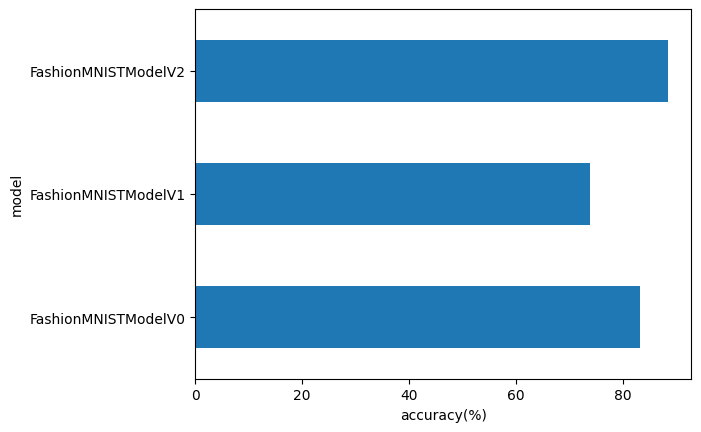

In [151]:
#Visualize our model results
compare_results.set_index("model_name")["moel_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

In [152]:
#Make and Evaluate random predictions with best model

In [154]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
    pred_probs=[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #Prepare the sample(add a batch dimension and pass to target device)
            sample=torch.unsqueeze(sample,dim=0).to(device)
            
            #Forward pass (model outputs logits)
            pred_logit=model(sample)
            
            #Get prediction probability (logit->prediction probability)
            pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
            
            
            #Get pred_porb off of GPU for further calculations 
            pred_probs.append(pred_prob.cpu())
            
    #stack the pred_probs to turn list to tensor
    return torch.stack(pred_probs)
            
            

In [157]:
import random
random.seed(42)
test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
   
#View the first sample 
test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

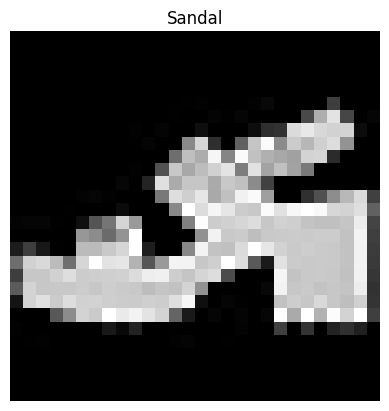

In [163]:
plt.imshow(test_samples[0].squeeze(0),cmap="gray")
plt.title(class_name[test_labels[0]])
plt.axis(False)

In [168]:
#Make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
#view first two prediction probabilities
pred_probs[:2]

tensor([[1.6023e-08, 5.2765e-09, 1.7971e-08, 3.0419e-09, 1.9903e-08, 9.9994e-01,
         7.2001e-08, 1.4467e-06, 4.8690e-06, 5.7390e-05],
        [4.9613e-02, 5.9018e-01, 1.5951e-03, 3.2028e-01, 6.8016e-03, 1.0227e-04,
         3.0905e-02, 9.5542e-05, 1.1035e-04, 3.1536e-04]])

In [173]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [167]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

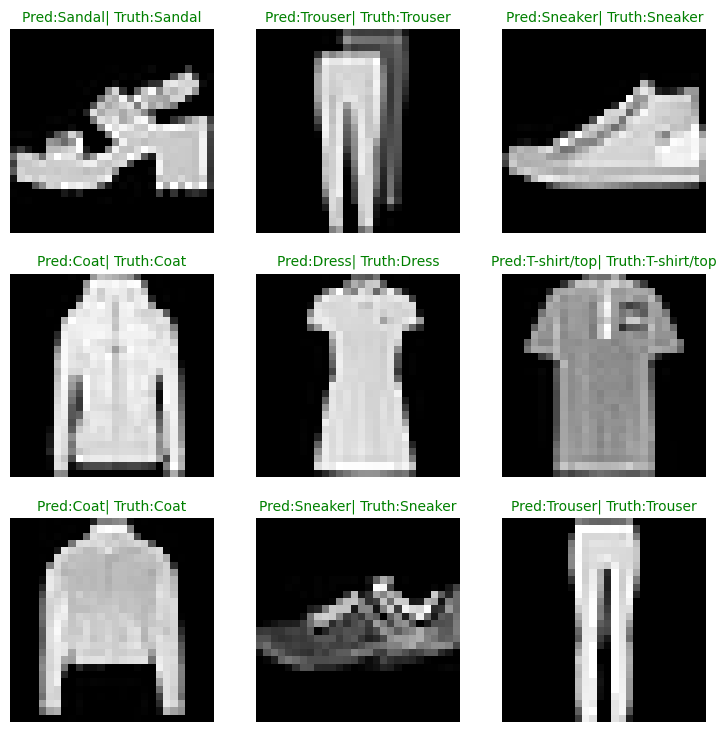

In [176]:
#Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i,sample in enumerate(test_samples):
    #create sub plots
    plt.subplot(nrows,ncols,i+1)
    
    #plot tje image
    plt.imshow(sample.squeeze(0),cmap="gray")
    
    #Find the predictions(in text form, eg:Sandle)
    pred_label=class_name[pred_classes[i]]
    
    #Find the truth label(in text form)
    truth_label=class_name[test_labels[i]]
    
    #Create the title for the plot
    title_text=f"Pred:{pred_label}| Truth:{truth_label}"
    
    #Check for equality between pred and Truth and change the color of the title
    if pred_label==truth_label:
        plt.title(title_text,fontsize=10,c='g') #green text if prediction is same as truth
    else:
        plt.title(title_text,fontsize=10,c="r")
    plt.axis(False)


In [177]:
#Making Confusion matrix for future prediction evaluation
#A confusion matrix is a fantastic way of evaluating your classification models visually:
 
#1.Make predictions with out trained model on the test dataset
#2.Make a confusion matrix torchmetrics.ConfusionMatrix
#3.Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix()


In [179]:
#Import tqdm.auto
from tqdm.auto import tqdm

#1.Make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions.............. "):
        #send data and targets to target device
        X,y=X.to(device),y.to(device)
        #Do the forward pass
        y_logits=model_2(X)
        #Turn predictions form logits------>prediction probabilities-------->prediction labels
        y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
        #put pridiction on CPU for evalution 
        y_preds.append(y_pred.cpu())

#concatenate list of predictions into a tensor
#print(y_preds)
y_preds_tensor=torch.cat(y_preds)
y_preds_tensor

Making predictions.............. : 100%|██████████| 313/313 [00:03<00:00, 80.08it/s]


tensor([9, 2, 1,  ..., 8, 1, 0])

In [184]:
#see if requierd packages are installed and if not, install them
try:
    import torchmetrics,mlxtend
    print(f"mlxtend version:{mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]>19,"mlxtend version should be 0.19 or higher")
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics,mlxtend
    print(f"mlxtend version:{mlxtend.__version__}")
    

mlxtend version:0.21.0
mlxtend version:0.21.0


In [188]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2.Setup confusion instance and compare predictions to target
confmat=ConfusionMatrix(task="multiclass",num_classes=len(class_name))
confmat_tensor=confmat(preds=y_preds_tensor,
                       target=test_data.targets)
confmat_tensor

tensor([[694,   5,  35,  49,  14,   0, 195,   0,   8,   0],
        [ 17, 778,   8, 165,  20,   1,   9,   0,   2,   0],
        [ 17,   4, 752,  18, 120,   0,  82,   0,   7,   0],
        [ 22,   8,  24, 868,  30,   0,  42,   0,   6,   0],
        [  6,   4,  68,  44, 785,   0,  91,   0,   2,   0],
        [  3,   0,   0,   5,   2, 775,  14, 102,  79,  20],
        [ 97,   7,  88,  60, 104,   0, 634,   0,  10,   0],
        [  0,   0,   0,   0,   0,  17,   0, 940,   7,  36],
        [ 13,   3,   5,  12,  10,   4,  17,   7, 927,   2],
        [  0,   0,   0,   0,   2,  32,   5, 107,  20, 834]])

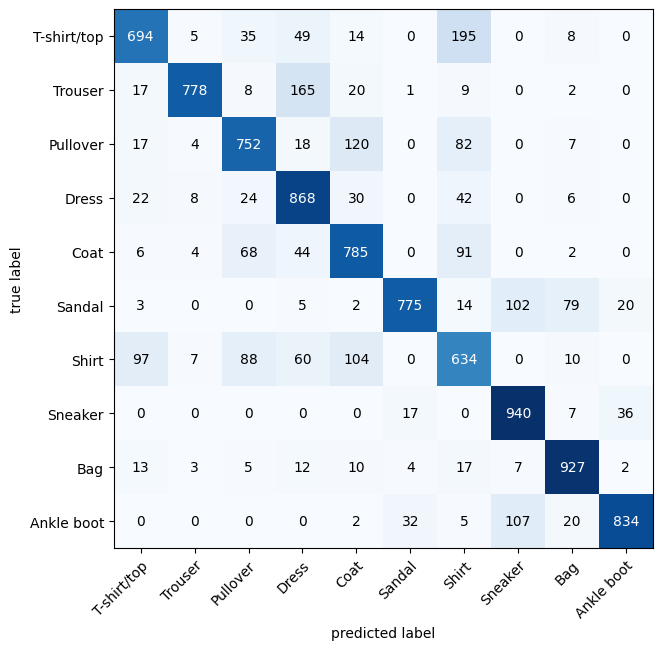

In [189]:
#3 plot the confusion matrix
fig, ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplot likes working with numpy
    class_names=class_name,
    figsize=(10,7)
)

In [197]:
from torchmetrics import F1Score

f1_score=F1Score(task="multiclass",num_classes=len(class_name))
result_f1_score=f1_score(preds=y_preds_tensor,
                         target=test_data.targets)
result_f1_score

tensor(0.7987)

In [190]:
#Save and load best performing model
from pathlib import Path

#Create model dictory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
#Create model save
MODEL_NAME="Computer_vision_01.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#Save the model state dict 
print(f"Saving the model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to:models/Computer_vision_01.pth


In [192]:
#Create new instance
torch.manual_seed(42)

load_model_2=FashionMNISTModelV2(input_shape=1,
                                 hidden_shape=10,
                                 output_shape=len(class_name))

#Load in the save state_dict()
load_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
load_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [193]:
model_2_result

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3279045522212982,
 'moel_acc': 88.4285143769968}

In [196]:
#Evaluate loaded model
torch.manual_seed(42)
load_model_2_result=eval_model(model=load_model_2,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn
                            )
load_model_2_result

100%|██████████| 313/313 [00:01<00:00, 312.43it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2903996706008911,
 'moel_acc': 89.3270766773163}

In [195]:
 #Check if model result are close to each other 
torch.isclose(torch.tensor(model_2_result["model_loss"]),
               torch.tensor(load_model_2_result["model_loss"]))

tensor(False)